In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from wrangle import wrangle_grades

from sklearn.model_selection import train_test_split

In [2]:
# plt.rc sets defaults for matplotlib figures
plt.rc('font', size = 13)
plt.rc('figure', figsize=(13, 7))

In [3]:
df = wrangle_grades()
df.head()

,exam1,exam2,exam3,final_grade
0,100,90,95,96
1,98,93,96,95
2,85,83,87,87
3,83,80,86,85
4,93,90,96,97


In [4]:
train_validate, test = train_test_split(df, test_size = .1, random_state = 123)
train, validate = train_test_split(train_validate, test_size = .15, random_state=123)

In [5]:
train.shape, validate.shape, test.shape

((77, 4), (14, 4), (11, 4))

In [6]:
train.head()

,exam1,exam2,exam3,final_grade
75,58,65,70,68
13,100,90,95,96
14,98,93,96,95
70,79,70,85,81
89,57,65,75,65


### Continuous and Continuous

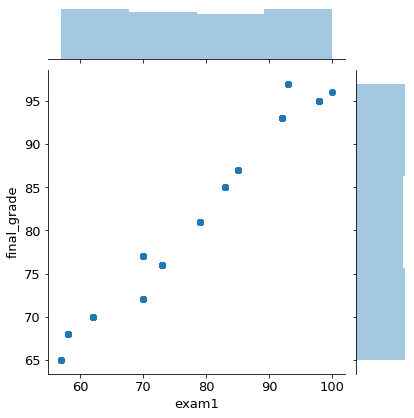

In [7]:
sns.jointplot(x = 'exam1', y = 'final_grade', data=train)

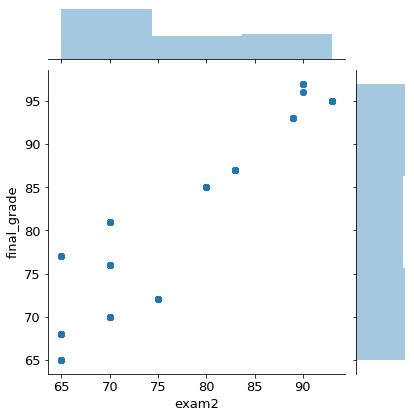

In [8]:
sns.jointplot(x = 'exam2', y = 'final_grade', data=train)

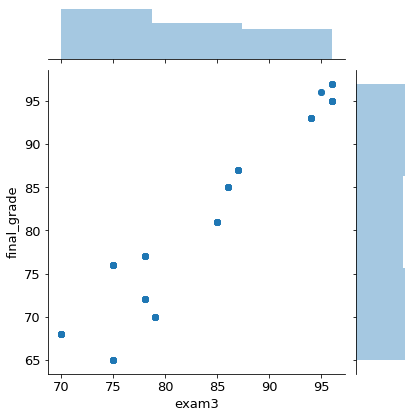

In [9]:
sns.jointplot(x = 'exam3', y = 'final_grade', data=train)

#### Takeaways
- Is there a stronger correlation between exams 1 and 3 and final grade compared to exam 2?

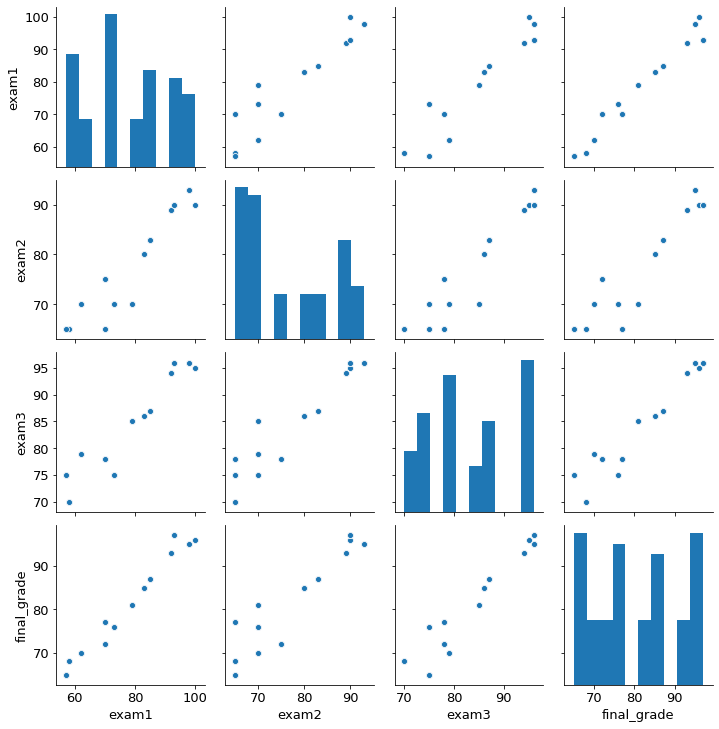

In [10]:
sns.pairplot(train)

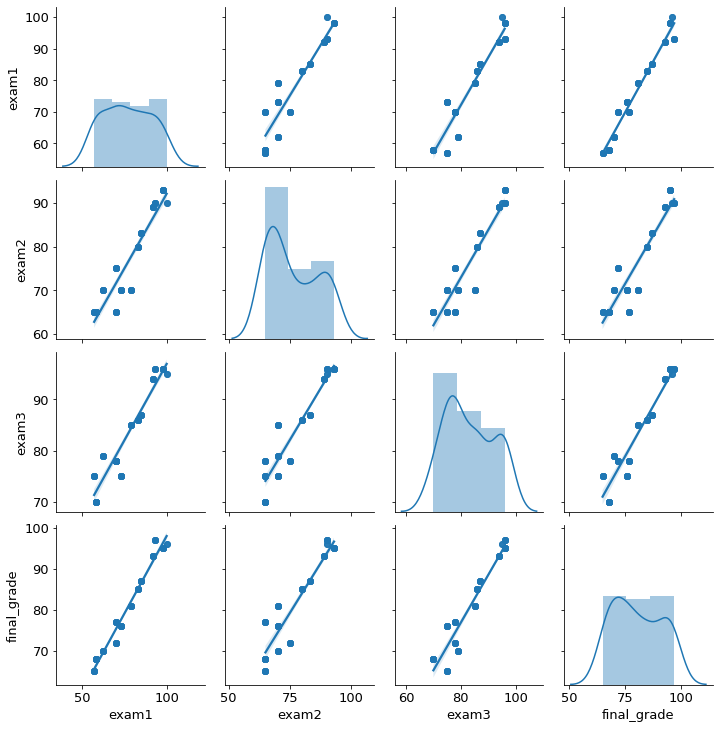

In [11]:
g = sns.PairGrid(train)
# we can specify any two functions we want for visualization
g.map_diag(sns.distplot) # single variable
g.map_offdiag(sns.regplot) # interaction of two variables

In [12]:
train.corr()

,exam1,exam2,exam3,final_grade
exam1,1.000000,0.931240,0.947847,0.984798
exam2,0.931240,1.000000,0.935160,0.923271
exam3,0.947847,0.935160,1.000000,0.953112
final_grade,0.984798,0.923271,0.953112,1.000000


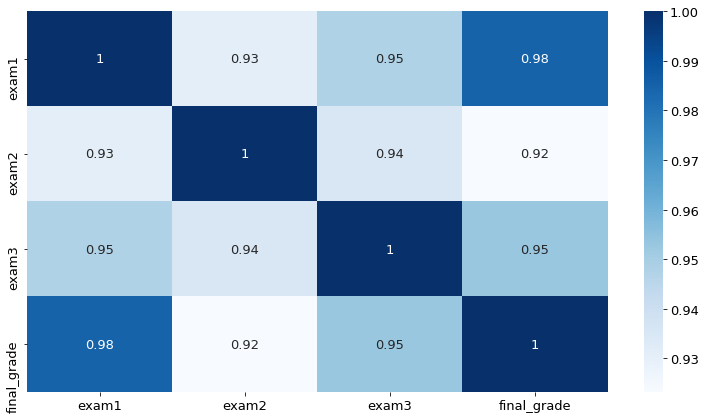

In [13]:
sns.heatmap(train.corr(), cmap='Blues', annot=True)

#### Takeaways
- Exam 2 has the **lowest** correlation with final grade
- Exam 1 has the **highest** correlation with final grade

#### Questions
- Why does exam 2 have a lower correlation?
    - Students are slacking midsemester?
    - The material covered on the final isn't the same as what is covered in exam 2?
    - The material covered midsemester is harder?

### Continuous and Categorical

In [14]:
train.head()

,exam1,exam2,exam3,final_grade
75,58,65,70,68
13,100,90,95,96
14,98,93,96,95
70,79,70,85,81
89,57,65,75,65


In [15]:
# We have turned a continuous variable into a categorical variable (letter grades)
pd.cut(train.exam1, bins=[0, 70, 80, 90, 105], labels=['F', 'C', 'B', 'A'])

75    F
13    A
14    A
70    C
89    F
     ..
85    C
66    A
49    F
55    B
63    F
Name: exam1, Length: 77, dtype: category
Categories (4, object): [F < C < B < A]

In [16]:
pd.cut(train.exam1, bins=[0, 70, 80, 90, 105], labels=['F', 'C', 'B', 'A']).value_counts()

F    32
A    20
C    13
B    12
Name: exam1, dtype: int64

In [17]:
# We have turned a continuous variable into a categorical variable (letter grades)
train['exam_1_letter_grades'] = pd.cut(train.exam1, bins=[0, 70, 80, 90, 105], labels=['F', 'C', 'B', 'A'])

Viz Types for Continuous X Categorical
- boxplot
- 

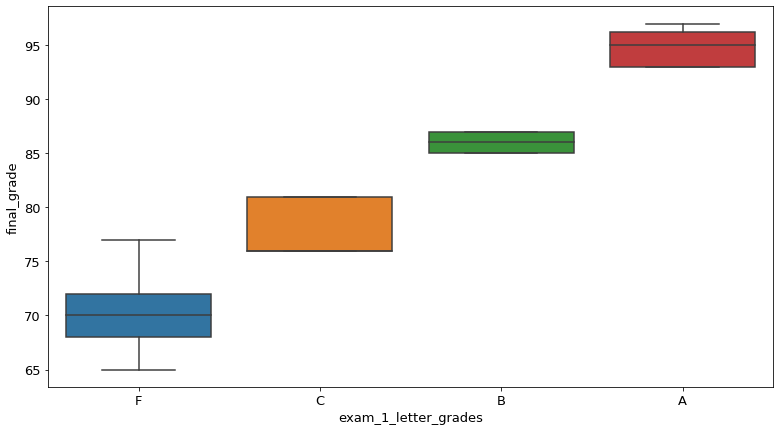

In [18]:
sns.boxplot(data=train, y='final_grade', x='exam_1_letter_grades')

#### Takeaways
- Students with Fs have the lowest score on the final grade and also have the most variation
- Students with Bs have very little variation

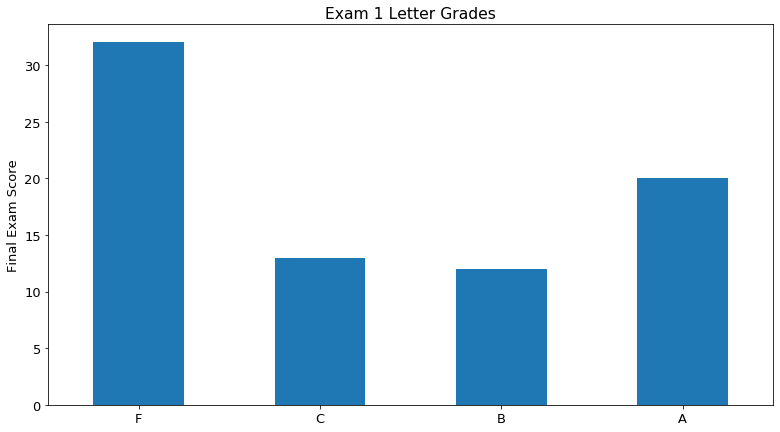

In [30]:
train.exam_1_letter_grades.value_counts().sort_index().plot.bar(title='Exam 1 Letter Grades') #Pandas plotting shortcut
plt.xticks(rotation=0)
plt.ylabel('Final Exam Score')
plt.show()

#### Takeaway
The students who made B's had the lowest variation in the final grade performance, despite having a decent number of observations. The low variance cannot be explained by a small number of observations. 

Questions
- Perhaps students making Bs have a specific test-taking approach or study-approach?

In [31]:
np.random.seed(123)
# make a fake category
train['classroom'] = np.random.choice(['One', 'Two'], train.shape[0])
train.head()

,exam1,exam2,exam3,final_grade,exam_1_letter_grades,classroom
75,58,65,70,68,F,One
13,100,90,95,96,A,Two
14,98,93,96,95,A,One
70,79,70,85,81,C,One
89,57,65,75,65,F,One


(0, 100)

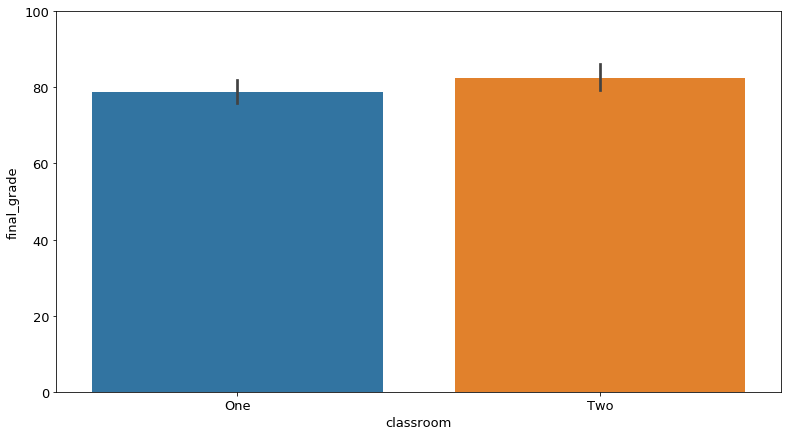

In [37]:
sns.barplot(data=train, y='final_grade', x='classroom')
plt.ylim(0, 100)

(0, 100)

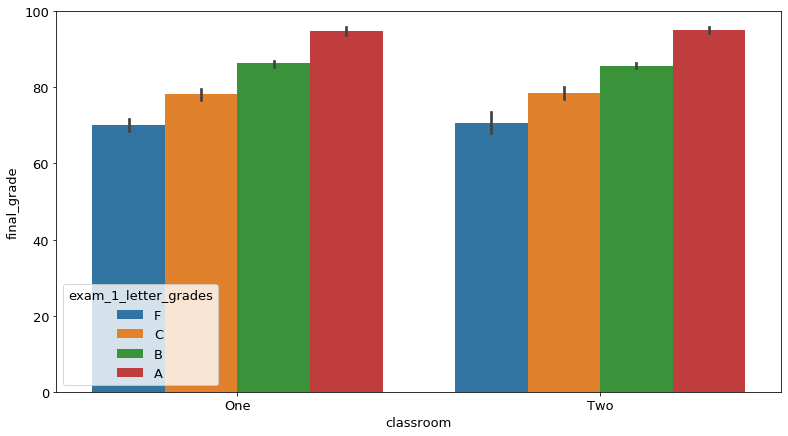

In [36]:
sns.barplot(data=train, y='final_grade', x='classroom', hue='exam_1_letter_grades')
plt.ylim(0, 100)

#### Takeaways:
There does not appear to be any relationship between classroom and final grade (which there should not be, as we made the classroom variable from coin flips. 

We can run a hypothesis test to confirm
- alpha = 0.05
- $H_0$: There is no relationship between final grade and classroom.
- $H_a$: There is a relationship between final grade and classroom.

In [38]:
from scipy import stats

stats.ttest_ind(train[train.classroom=='One'].final_grade, train[train.classroom=='Two'].final_grade, equal_var=False)

Ttest_indResult(statistic=-1.5459361516543233, pvalue=0.12659057864613976)

With a p-value of 0.13, we fail to reject the null hypothesis that there is no difference in final grade between classroom one and classroom two

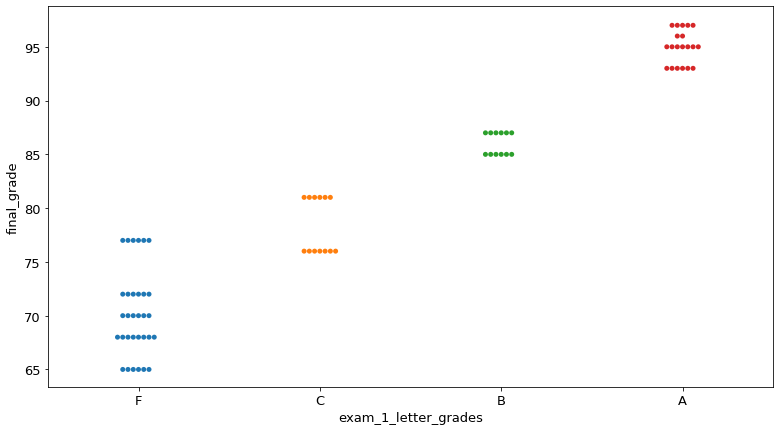

In [39]:
sns.swarmplot(data=train, y='final_grade', x='exam_1_letter_grades')

Text(0.5, 1.0, 'Classroom Two')

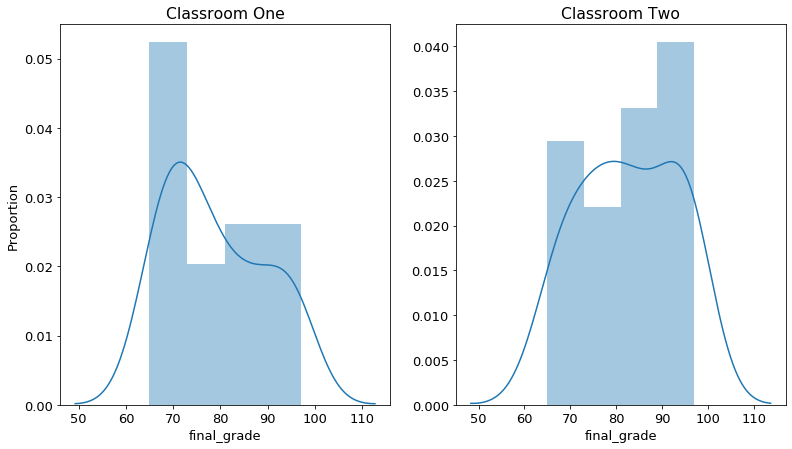

In [42]:
plt.subplot(121)
sns.distplot(train[train.classroom=='One'].final_grade)
plt.title('Classroom One')
plt.ylabel('Proportion')
plt.subplot(122)
sns.distplot(train[train.classroom=='Two'].final_grade)
plt.title('Classroom Two')

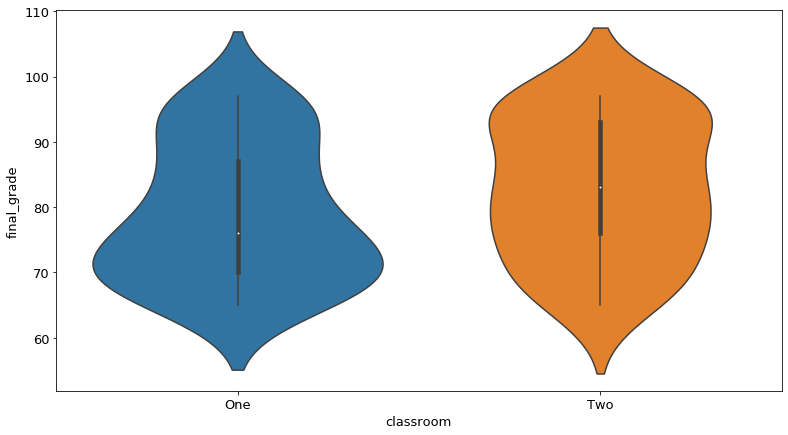

In [43]:
sns.violinplot(data=train, y='final_grade', x='classroom')

### Categorical and Categorical

In [44]:
train.head()

,exam1,exam2,exam3,final_grade,exam_1_letter_grades,classroom
75,58,65,70,68,F,One
13,100,90,95,96,A,Two
14,98,93,96,95,A,One
70,79,70,85,81,C,One
89,57,65,75,65,F,One


In [45]:
pd.crosstab(train.exam_1_letter_grades, train.classroom)

classroom,One,Two
exam_1_letter_grades,,
F,21,11
C,7,6
B,6,6
A,9,11


In [48]:
ctab = pd.crosstab(train.exam_1_letter_grades, train.classroom, normalize=True)
ctab.applymap('{:.1%}'.format)
# normalize=True - Looks at what percentage of observations fall into the intersection of these categories

classroom,One,Two
exam_1_letter_grades,,
F,27.3%,14.3%
C,9.1%,7.8%
B,7.8%,7.8%
A,11.7%,14.3%


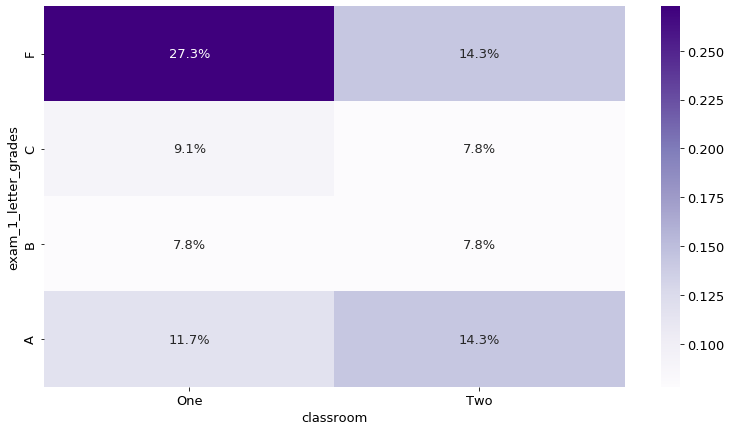

In [49]:
sns.heatmap(ctab, cmap='Purples', annot=True, fmt='.1%')

In [52]:
# Looks at the relative proportion along the columns (i.e. Classroom One had 45% of all As, and Classroom Two had 55% of all As)
# Each column will sum to 100%
pd.crosstab(train.classroom, train.exam_1_letter_grades, normalize='columns')

exam_1_letter_grades,F,C,B,A
classroom,,,,
One,0.65625,0.538462,0.5,0.45
Two,0.34375,0.461538,0.5,0.55


In [53]:
# Looks at the proportions along the rows (i.e. Classroom One had 49% As, 16% Bs, etc.)
pd.crosstab(train.classroom, train.exam_1_letter_grades, normalize='index')

exam_1_letter_grades,F,C,B,A
classroom,,,,
One,0.488372,0.162791,0.139535,0.209302
Two,0.323529,0.176471,0.176471,0.323529


In [57]:
ctab = pd.crosstab(train.exam_1_letter_grades, train.classroom)

In [58]:
chi2, p, degf, expected = stats.chi2_contingency(ctab)
print(p)

0.4968960149144317


With a p-value of .497, we fail to reject our null hypothesis